# Week 3 - Practice

Use the following examples as ways to prepare data

In [1]:
# get a dataset we can use for demonstration
import pandas as pd

grades = pd.read_csv('class-grades.csv', index_col=0)
grades.head() # sample of what the dataset looks like

,Prefix,Assignment1,Tutorial,Midterm,Quiz,Final,TakeHome,Student,Misc,Nothing,FinalGrade,work_status,scholarship
0,5,57.14,34.09,72.0,72.0,52.50,F,1,0.0,NaN,54.0,half_time,no
1,8,95.05,105.49,84.0,84.0,68.33,A,1,NaN,NaN,81.0,half_time,yes
2,8,83.70,83.17,73.0,73.0,48.89,D,1,NaN,NaN,55.0,not_employed,no
3,7,81.22,96.06,81.0,81.0,80.56,A,1,NaN,NaN,71.0,half_time,no
4,8,91.32,NaN,70.0,70.0,73.89,A,1,NaN,NaN,89.0,NaN,yes


In [2]:
grades.info() # check data types and non-null count

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Prefix       99 non-null     int64  
 1   Assignment1  95 non-null     float64
 2   Tutorial     88 non-null     float64
 3   Midterm      92 non-null     float64
 4   Quiz         92 non-null     float64
 5   Final        96 non-null     float64
 6   TakeHome     92 non-null     object 
 7   Student      99 non-null     int64  
 8   Misc         1 non-null      float64
 9   Nothing      0 non-null      float64
 10  FinalGrade   96 non-null     float64
 11  work_status  92 non-null     object 
 12  scholarship  99 non-null     object 
dtypes: float64(8), int64(2), object(3)
memory usage: 10.8+ KB


## Cardinality of Variables and Duplications

* Uneven distribution of labels between train and test sets (some may appear in one set and not in other)
* Variables with many labels dominate over those with fewer labels
* Many labels introduces noise with little or no information
* Reducing may help model performance
* Removing variables with low cardinality may help model performance

In [3]:
# check for variables with only one value
constant_values = [
    val for val in grades.columns if len(grades[val].unique()) == 1
]

constant_values

['Student', 'Nothing']

In [4]:
# drop missing values and then check how many unique values are in each variable
few_values = [
    val for val in grades.columns if len(grades[val].fillna(0).unique()) == 1
]

few_values

['Student', 'Misc', 'Nothing']

In [5]:
# quasi constant values (sometimes these may be boolean features)
for val in grades.columns.sort_values():
    if (len(grades[val].unique()) < 3):
        print(grades[val].value_counts())

0.0    1
Name: Misc, dtype: int64
Series([], Name: Nothing, dtype: int64)
1    99
Name: Student, dtype: int64
yes    65
no     34
Name: scholarship, dtype: int64


In [6]:
# check of duplications
duplicate_variables = []
for i in range(0, len(grades.columns)):
    orig = grades.columns[i]

    for dupe in grades.columns[i + 1:]:
        if grades[orig].equals(grades[dupe]):
            duplicate_variables.append(dupe)
            print(f'{orig} looks the same as {dupe}')
            
duplicate_variables

Midterm looks the same as Quiz


['Quiz']

### Summary

Drop 'Quiz', 'Student', 'Misc', 'Nothing'

In [7]:
# drop the variables that are duplicated or low in variance
grades.drop(['Quiz', 'Student', 'Misc', 'Nothing'], axis=1, inplace=True)
grades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Prefix       99 non-null     int64  
 1   Assignment1  95 non-null     float64
 2   Tutorial     88 non-null     float64
 3   Midterm      92 non-null     float64
 4   Final        96 non-null     float64
 5   TakeHome     92 non-null     object 
 6   FinalGrade   96 non-null     float64
 7   work_status  92 non-null     object 
 8   scholarship  99 non-null     object 
dtypes: float64(5), int64(1), object(3)
memory usage: 7.7+ KB


## Imputing Missing Values

### Mean and Median

https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/

In [8]:
# count nulls
grades.isnull().sum()

Prefix          0
Assignment1     4
Tutorial       11
Midterm         7
Final           3
TakeHome        7
FinalGrade      3
work_status     7
scholarship     0
dtype: int64

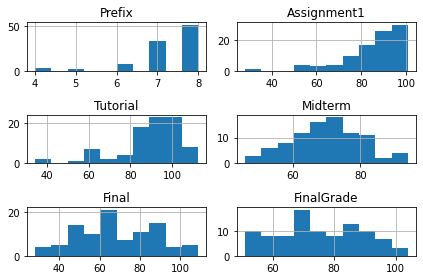

In [9]:
# look at the shape of variables that are numerical
import matplotlib.pyplot as plt

grades.hist()
plt.tight_layout();

### Summary of Histograms

* Prefix looks discrete, probably nominal numeric
* Recall examples of skewness, specifically left skewed data
* Scores on easy exams - https://www.statology.org/negatively-skewed-distribution-examples/
* Assignment 1 and Tutorial kind of look left skewed (negatively skewed)
* For this demonstration we will consider Midterm, Final, and Final Grade to be normal

#### Mean Imputation

* Midterm, Final, and FinalGrade

#### Median Imputation

* Assignment1, Tutorial

In [10]:
# impute missing values with mean and median
grades['Midterm'].fillna(round(grades['Midterm'].mean(), 2), inplace=True)
grades['Final'].fillna(grades['Final'].mean(), inplace=True)
grades['FinalGrade'].fillna(grades['FinalGrade'].mean(), inplace=True)
grades['Assignment1'].fillna(grades['Assignment1'].median(), inplace=True)
grades['Tutorial'].fillna(grades['Tutorial'].median(), inplace=True)
grades.isnull().sum()

Prefix         0
Assignment1    0
Tutorial       0
Midterm        0
Final          0
TakeHome       7
FinalGrade     0
work_status    7
scholarship    0
dtype: int64

### Mode

Let's see what our value_counts show

In [11]:
print(grades['TakeHome'].value_counts(dropna=False))
print(grades['work_status'].value_counts(dropna=False))

A      43
B      18
D      12
C      10
F       9
NaN     7
Name: TakeHome, dtype: int64
not_employed    47
half_time       35
full_time       10
NaN              7
Name: work_status, dtype: int64


TakeHome is a letter grade and it doesn't make sense to use mode.

In [12]:
# replace work_status with mode (not employed)
grades['work_status'].fillna(grades['work_status'].mode()[0], inplace=True)
grades.isnull().sum()

Prefix         0
Assignment1    0
Tutorial       0
Midterm        0
Final          0
TakeHome       7
FinalGrade     0
work_status    0
scholarship    0
dtype: int64

### Replace Missing Values using a Function

In [13]:
# replace TakeHome with function
def convert_grade(row):
    if len(str(row['TakeHome'])) > 1:
        if row['Final'] >= 90:
            return 'A'
        if row['Final'] >= 80:
            return 'B'
        if row['Final'] >= 70:
            return 'C'
        if row['Final'] >= 60:
            return 'D'
        if row['Final'] < 60:
            return 'F'
    else:
        return row['TakeHome']
        
grades['TakeHome'] = grades.apply(convert_grade, axis=1)
grades['TakeHome'].fillna('Missing', inplace=True)
print(grades.isnull().sum())
print(grades['TakeHome'].value_counts())

Prefix         0
Assignment1    0
Tutorial       0
Midterm        0
Final          0
TakeHome       0
FinalGrade     0
work_status    0
scholarship    0
dtype: int64
A    43
B    19
D    14
F    13
C    10
Name: TakeHome, dtype: int64


In [14]:
grades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Prefix       99 non-null     int64  
 1   Assignment1  99 non-null     float64
 2   Tutorial     99 non-null     float64
 3   Midterm      99 non-null     float64
 4   Final        99 non-null     float64
 5   TakeHome     99 non-null     object 
 6   FinalGrade   99 non-null     float64
 7   work_status  99 non-null     object 
 8   scholarship  99 non-null     object 
dtypes: float64(5), int64(1), object(3)
memory usage: 7.7+ KB


In [15]:
# scholarship is yes, no. map yes as 1 and no as 0
grades['scholarship'] = grades['scholarship'].map({'yes':1,'no':0})
grades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Prefix       99 non-null     int64  
 1   Assignment1  99 non-null     float64
 2   Tutorial     99 non-null     float64
 3   Midterm      99 non-null     float64
 4   Final        99 non-null     float64
 5   TakeHome     99 non-null     object 
 6   FinalGrade   99 non-null     float64
 7   work_status  99 non-null     object 
 8   scholarship  99 non-null     int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 7.7+ KB


In [16]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(grades.drop('FinalGrade', axis=1), grades['FinalGrade'], test_size=0.2, random_state=42)
X_train.head()

,Prefix,Assignment1,Tutorial,Midterm,Final,TakeHome,work_status,scholarship
49,8,92.46,95.75,79.00,48.89,B,not_employed,0
70,8,90.98,97.55,69.88,90.00,B,not_employed,1
68,7,100.83,105.57,55.00,108.89,A,not_employed,0
15,7,93.83,95.43,69.88,90.00,B,not_employed,1
39,7,95.00,94.36,67.00,85.00,B,not_employed,1


## Next Practice

The model we will eventually build works with numerical values so next time we'll take care of the Dtype objects (categorical data) and the variable called Prefix, which seems to be Nominal.

* Exploratory Data Analysis (EDA)
* Tables, Pivot Tables, Cross Tab Tables, GroupBys
* One Hot Encoding
* Linear Regression
* MSE and r squared
* StatsModel OLS Summary